# Forecasting - Time Series

#### Build a forecast model on airlines monthly passenger footfalls in the year 1995 to 2002. Also forecast the footfall for next 5years using the least RMSE model.

In [1]:
# import libraries
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
from statsmodels.tsa.ar_model import AutoReg

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
airlines = pd.read_excel(r"D:\360digi\DS\Sharath\Forecasting_3_Smoothing\handson\Datasets_Forecasting-3\Airlines Data.xlsx")
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
airlines.head(15)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [ ]:
# To extract month from timestamp 
# pd.DatetimeIndex(airlines['Month']).month

In [ ]:
# To extract year and month from timestamp 
# airlines['Month'].dt.to_period('M')

In [5]:
airlines['Month'][0]

Timestamp('1995-01-01 00:00:00')

In [6]:
# extract only the month and year from the timestamp to a new dataframe
df=  pd.DataFrame(airlines['Month'].apply(lambda x: x.strftime('%B-%Y'))) 

In [7]:
df.head()

,Month
0,January-1995
1,February-1995
2,March-1995
3,April-1995
4,May-1995


In [ ]:
#df['month'] = 0

In [8]:
#  extract only the month characters from column
df['month'] = pd.DataFrame(df['Month'].apply(lambda x: x[0:3]))

In [9]:
df.head(15)

,Month,month
0,January-1995,Jan
1,February-1995,Feb
2,March-1995,Mar
3,April-1995,Apr
4,May-1995,May
5,June-1995,Jun
6,July-1995,Jul
7,August-1995,Aug
8,September-1995,Sep
9,October-1995,Oct


In [10]:
# create dummy variables for all the 12 months
month_dummies = pd.DataFrame(pd.get_dummies(df['month']))
month_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [11]:
airlines_df = pd.concat([airlines, month_dummies], axis = 1)
airlines_df

,Month,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,0,0,0,0,0,0,0,0,0,1,0,0


# Data Preprocessing

In [12]:
# Linear Trend is captured
airlines_df["t"] = np.arange(1,97)
airlines_df

,Month,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t
0,1995-01-01,112,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1995-02-01,118,0,0,0,1,0,0,0,0,0,0,0,0,2
2,1995-03-01,132,0,0,0,0,0,0,0,1,0,0,0,0,3
3,1995-04-01,129,1,0,0,0,0,0,0,0,0,0,0,0,4
4,1995-05-01,121,0,0,0,0,0,0,0,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,0,1,0,0,0,0,0,0,0,0,0,0,92
92,2002-09-01,355,0,0,0,0,0,0,0,0,0,0,0,1,93
93,2002-10-01,306,0,0,0,0,0,0,0,0,0,0,1,0,94
94,2002-11-01,271,0,0,0,0,0,0,0,0,0,1,0,0,95


In [13]:
# Quadratic trend or polynomial with '2' degrees trend is captured
airlines_df["t_square"] = airlines_df["t"] * airlines_df["t"]

In [14]:
# Exponential trend is captured
airlines_df["log_Passengers"] = np.log(airlines_df["Passengers"])

In [15]:
airlines_df

,Month,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,1995-01-01,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


<AxesSubplot:>

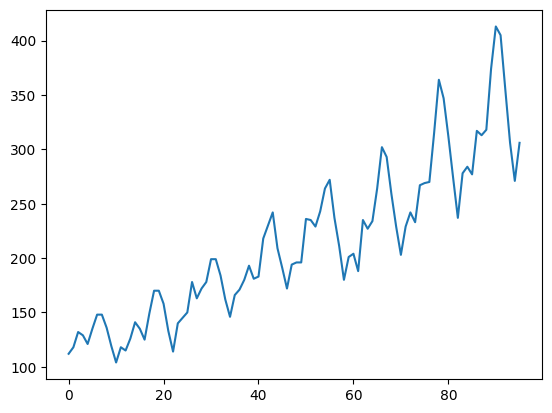

In [16]:
# Visualization - Time plot
airlines_df.Passengers.plot()

In [17]:
# Trend - upward

In [20]:
# Data Partition
Train = airlines_df.head(84)
Test = airlines_df.tail(12)

In [21]:
Test

,Month,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
84,2002-01-01,284,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,5.648974
85,2002-02-01,277,0,0,0,1,0,0,0,0,0,0,0,0,86,7396,5.624018
86,2002-03-01,317,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902
87,2002-04-01,313,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203
88,2002-05-01,318,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051
89,2002-06-01,374,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256
90,2002-07-01,413,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448
91,2002-08-01,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585


# Forecasting models

In [22]:
# Linear Model
linear_model = smf.ols('Passengers ~ t', data = Train).fit()

In [23]:
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(pred_linear))**2))
rmse_linear

53.199236534802715

In [24]:
# Exponential Model
Exp = smf.ols('log_Passengers ~ t', data = Train).fit()

In [25]:
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.0573611031562

In [26]:
# Quadratic Model
Quad = smf.ols('Passengers ~ t + t_square', data = Train).fit()

In [27]:
pred_Quad = pd.Series(Quad.predict(Test[["t", "t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(pred_Quad))**2))
rmse_Quad

48.051888979330975

In [28]:
# Additive Seasonality
add_sea = smf.ols('Passengers ~ Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov', data = Train).fit()

In [29]:
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(pred_add_sea))**2))
rmse_add_sea

132.81978481421817

In [30]:
# Multiplicative Seasonality
Mul_sea = smf.ols('log_Passengers ~ Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov', data = Train).fit()

In [31]:
pred_Mult_sea = pd.Series(Mul_sea.predict(Test[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']]))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

140.06320204708615

In [32]:
# Additive Seasonality Quadratic Trend
add_sea_Quad = smf.ols('Passengers ~ t + t_square + Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov', data = Train).fit()

In [33]:
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 't', 't_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.360817612086706

In [34]:
# Multiplicative Seasonality Linear Trend
Mul_sea_linear = smf.ols('log_Passengers ~ t + Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov', data = Train).fit()

In [35]:
pred_Mult_sea_linear = pd.Series(Mul_sea_linear.predict(Test[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 't']]))
rmse_Mult_sea_linear = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(np.exp(pred_Mult_sea_linear)))**2))
rmse_Mult_sea_linear

10.519172544323922

In [36]:
data = {"MODEL":pd.Series(["rmse_linear", "rmse_Exp", "rmse_Quad", "rmse_add_sea", "rmse_Mult_sea", "rmse_add_sea_quad", "rmse_Mult_sea_linear"]), "RMSE_Values":pd.Series([rmse_linear, rmse_Exp, rmse_Quad, rmse_add_sea, rmse_Mult_sea, rmse_add_sea_quad, rmse_Mult_sea_linear])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,53.199237
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
3,rmse_add_sea,132.819785
4,rmse_Mult_sea,140.063202
5,rmse_add_sea_quad,26.360818
6,rmse_Mult_sea_linear,10.519173


In [37]:
# 'rmse_Mult_sea_linear' has the least RMSE value among the models prepared so far. Use these features and build forecasting model using entire data

In [38]:
model = smf.ols('log_Passengers ~ t + Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov', data = airlines_df).fit()

In [ ]:
# RESIDUALS MIGHT HAVE ADDITIONAL INFORMATION!

In [39]:
# Autoregression Model (AR)
# Calculating Residuals from best model applied on full data
# AV - FV
full_res = airlines_df.Passengers - model.predict(airlines_df)
full_res

0     107.307037
1     113.296513
2     127.153334
3     124.186186
4     116.192709
         ...    
91    399.021661
92    349.131900
93    300.262011
94    265.392462
95    300.255915
Length: 96, dtype: float64

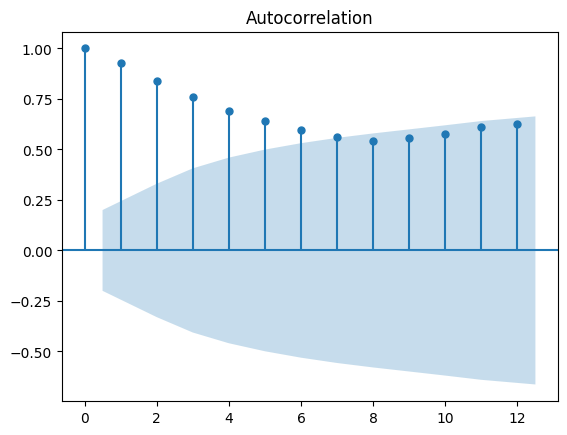

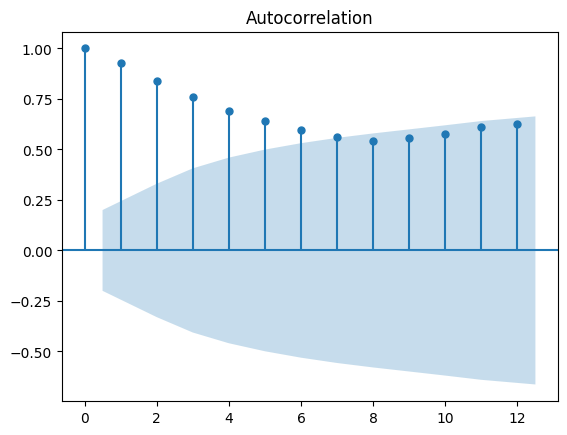

In [40]:
# ACF plot on residuals
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(full_res, lags = 12)

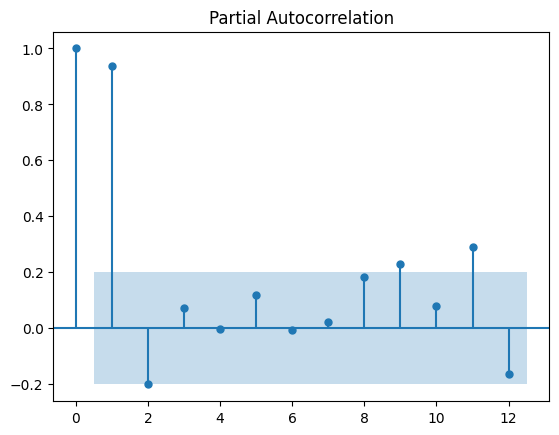

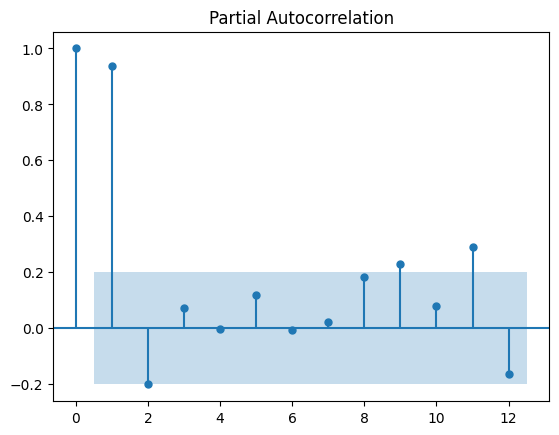

In [41]:
# PACF is a partial auto-correlation function. It finds correlations of Y with lags of the residuals of the time series 
tsa_plots.plot_pacf(full_res, lags = 12)

In [42]:
# AR Autoregressive model
model_ar = AutoReg(full_res, lags = [1])
model_fit = model_ar.fit()

In [43]:
print('Coefficients: %s' % model_fit.params)

Coefficients: intercept    13.465404
y.L1          0.944877
dtype: float64


### Predict for next 5years

In [44]:
# Predict for next 5years
pred_res = model_fit.predict(start = len(airlines_df), end = len(airlines_df) + 60 - 1, dynamic = False)
pred_res.reset_index(drop = True, inplace = True)

In [45]:
# The Final Predictions using MSLT and AR(1) Model
type(pred_res)

pandas.core.series.Series

In [46]:
df_pred = pd.DataFrame(pred_res, columns = ["Passengers_Prediction"])
df_pred.head()

,Passengers_Prediction
0,297.170191
1,294.254563
2,291.499654
3,288.896605
4,286.437045


In [47]:
nxt_five = pd.date_range(start='2003-1-1', end = '2007-12-1',  freq= pd.offsets.MonthBegin(1)) #periods = 12,, closed = 'both'

In [48]:
type(nxt_five)

pandas.core.indexes.datetimes.DatetimeIndex

In [49]:
df_5yrs = pd.DataFrame(nxt_five, columns= ["Months"])

In [50]:
nxt_fiv_pred = pd.concat([df_5yrs, df_pred], axis = 1)
nxt_fiv_pred.head(12)

,Months,Passengers_Prediction
0,2003-01-01,297.170191
1,2003-02-01,294.254563
2,2003-03-01,291.499654
3,2003-04-01,288.896605
4,2003-05-01,286.437045
5,2003-06-01,284.113064
6,2003-07-01,281.917189
7,2003-08-01,279.842358
8,2003-09-01,277.881899
9,2003-10-01,276.029507
